# Filip Kucia

## P7.2

Add the above solutions for the plots from the previous project.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

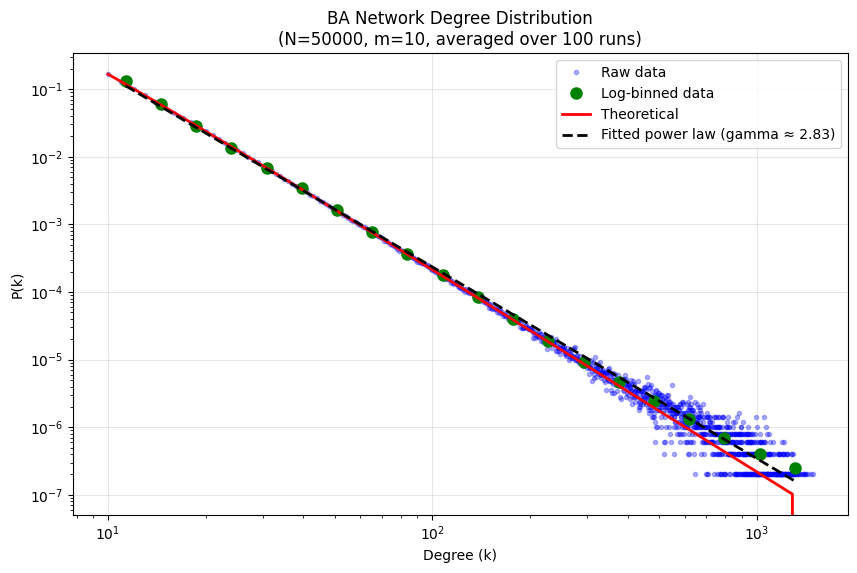

Power law exponent (gamma) = 2.833 ± 0.025
R-squared value = 0.999


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

def generate_ba_network(N=1000, m=2):
    G = nx.barabasi_albert_graph(N, m)
    degrees = [d for _, d in G.degree()]
    return degrees

def get_degree_distribution(degrees):
    count = Counter(degrees)
    max_degree = max(degrees)
    dist = np.zeros(max_degree + 1)
    for k in range(max_degree + 1):
        dist[k] = count.get(k, 0)
    return dist / len(degrees)

def theoretical_distribution(k, m):
    return 2*m*(m+1) / (k*(k+1)*(k+2))

def log_bin_data(x, y, n_bins=20):
    bin_edges = np.logspace(np.log10(min(x)), np.log10(max(x)), n_bins+1)
    bins = []
    counts = []
    
    for i in range(len(bin_edges)-1):
        mask = (x >= bin_edges[i]) & (x < bin_edges[i+1])
        if np.sum(mask) > 0:
            bins.append(np.sqrt(bin_edges[i] * bin_edges[i+1]))
            counts.append(np.mean(y[mask]))
            
    return np.array(bins), np.array(counts)

N = 50000
m = 10
num_runs = 100 

max_degree = 0
all_distributions = []

for _ in range(num_runs):
    degrees = generate_ba_network(N, m)
    dist = get_degree_distribution(degrees)
    max_degree = max(max_degree, len(dist))
    all_distributions.append(dist)

padded_distributions = []
for dist in all_distributions:
    padded = np.zeros(max_degree)
    padded[:len(dist)] = dist
    padded_distributions.append(padded)

avg_distribution = np.mean(padded_distributions, axis=0)

k_values = np.arange(m, max_degree)
theoretical = theoretical_distribution(k_values, m)

# Log binning
k_values_nonzero = k_values[avg_distribution[m:] > 0]
dist_nonzero = avg_distribution[m:][avg_distribution[m:] > 0]
binned_k, binned_dist = log_bin_data(k_values_nonzero, dist_nonzero)

log_k = np.log10(binned_k)
log_dist = np.log10(binned_dist)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_dist)
gamma = -slope

plt.figure(figsize=(10, 6))
plt.loglog(k_values, avg_distribution[m:], 'bo', label='Raw data', alpha=0.3, markersize=3)
plt.loglog(binned_k, binned_dist, 'go', label='Log-binned data', markersize=8)
plt.loglog(k_values, theoretical, 'r-', label='Theoretical', linewidth=2)
plt.loglog(binned_k, 10**(intercept) * binned_k**(-gamma), 'k--', 
          label=f'Fitted power law (gamma ≈ {gamma:.2f})', linewidth=2)
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.title(f'BA Network Degree Distribution\n(N={N}, m={m}, averaged over {num_runs} runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Power law exponent (gamma) = {gamma:.3f} ± {std_err:.3f}")
print(f"R-squared value = {r_value**2:.3f}")

## P7.3 

In [2]:
def calculate_metrics(x, y_true, y_pred):
    r_squared = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return r_squared, rmse

fitted_dist = 10**(intercept) * binned_k**(-gamma)
theoretical_binned = theoretical_distribution(binned_k, m)

r2_theoretical, rmse_theoretical = calculate_metrics(
    np.log10(binned_dist),
    np.log10(binned_dist),
    np.log10(theoretical_binned)
)

r2_fitted, rmse_fitted = calculate_metrics(
    np.log10(binned_dist),
    np.log10(binned_dist),
    np.log10(fitted_dist)
)

print("\nGoodness of fit metrics (calculated on log-transformed data):")
print(f"\nTheoretical Distribution:")
print(f"R-squared = {r2_theoretical:.3f}")
print(f"RMSE = {rmse_theoretical:.3f}")

print(f"\nFitted Power Law:")
print(f"R-squared = {r2_fitted:.3f}")
print(f"RMSE = {rmse_fitted:.3f}")
print(f"Power law exponent (gamma) = {gamma:.3f} ± {std_err:.3f}")


Goodness of fit metrics (calculated on log-transformed data):

Theoretical Distribution:
R-squared = 0.995
RMSE = 0.128

Fitted Power Law:
R-squared = 0.999
RMSE = 0.065
Power law exponent (gamma) = 2.833 ± 0.025


## P7.7

Check with simulation the above result. Plot the size of the largest cluster as a function of $\langle k \rangle = pN $

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


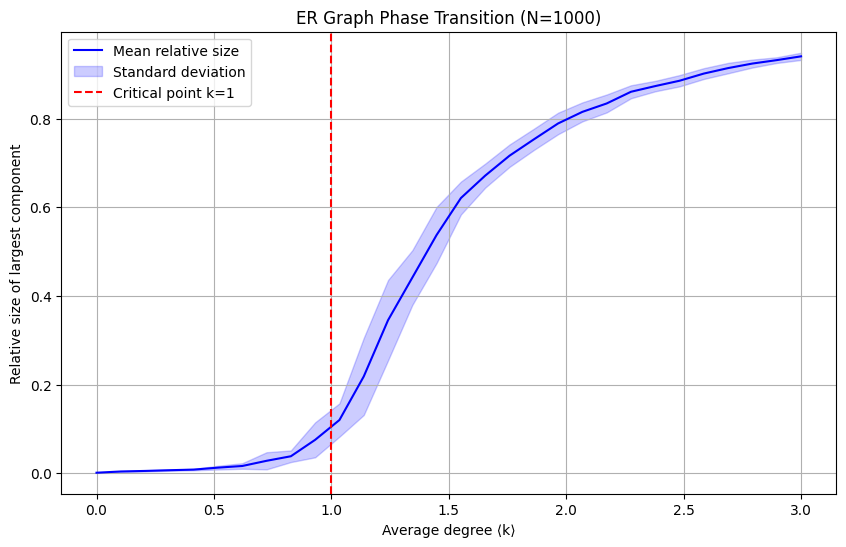

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_er_largest_component(N, k_avg, num_realizations=10):
    p = k_avg / (N - 1)  # Convert average degree to probability
    sizes = []
    
    for _ in range(num_realizations):
        # Generate ER graph
        G = nx.erdos_renyi_graph(N, p)
        
        # Find largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        relative_size = len(largest_cc) / N
        sizes.append(relative_size)
    
    return np.mean(sizes), np.std(sizes)

# Simulation parameters
N = 1000  # Number of nodes
k_avg_range = np.linspace(0, 3, 30)  # Range of average degrees to test
num_realizations = 20  # Number of realizations per point

# Store results
sizes_mean = []
sizes_std = []

# Run simulations
for k_avg in k_avg_range:
    mean_size, std_size = simulate_er_largest_component(N, k_avg, num_realizations)
    sizes_mean.append(mean_size)
    sizes_std.append(std_size)

# Convert to numpy arrays for convenience
sizes_mean = np.array(sizes_mean)
sizes_std = np.array(sizes_std)

# Plot results with shaded error bands
plt.figure(figsize=(10, 6))
plt.plot(k_avg_range, sizes_mean, label='Mean relative size', color='blue')
plt.fill_between(k_avg_range, sizes_mean - sizes_std, sizes_mean + sizes_std, 
                 color='blue', alpha=0.2, label='Standard deviation')
plt.axvline(x=1, color='red', linestyle='--', label='Critical point k=1')
plt.grid(True)
plt.xlabel('Average degree ⟨k⟩')
plt.ylabel('Relative size of largest component')
plt.title(f'ER Graph Phase Transition (N={N})')
plt.legend()
plt.show()


This simulation **confirms** the theoretical prediction that the percolation threshold for ER graphs occurs at $\langle k \rangle=1$ with $p_c=\frac{1}{N}$

## P 7.16

## Percolation in scale-free networks

$$ P(k) = (\alpha - 1)m^{\alpha - 1}k^{-\alpha}, \quad k = m, m + 1, \ldots, $$

where:

$$ k_{\text{max}} = mN^{1/(\alpha - 1)} $$



Compute percolation threshold for scale-free networks with power-law degree distribution:

$$ \frac{\langle k^2 \rangle}{\langle k \rangle} = ? $$


**Solution:**

$$
\frac{\langle k^2 \rangle}{\langle k \rangle} = \frac{2 - \alpha}{3 - \alpha}
\begin{cases} 
k_{\text{max}}, & \alpha \in (1, 2) \\
m^{\alpha - 2}k_{\text{max}}^{3 - \alpha}, & \alpha \in (2, 3) \\
m, & \alpha \in (3, \infty).
\end{cases}
$$

**Answer**

We start with the **first moment** $\langle k \rangle$:

$$ \langle k \rangle = \sum_{k = m}^{k_{\text{max}}} kP(k). $$


We substitute $P(k) = (\alpha - 1)m^{\alpha - 1}k^{-\alpha}$ to get:  

$$ \langle k \rangle = (\alpha - 1)m^{\alpha - 1} \sum_{k = m}^{k_{\text{max}}} k^{1-\alpha} $$

For very large $N$, we can approximate this sum as an integral w.r.t. k:
$$ \langle k \rangle \approx (\alpha - 1)m^{\alpha - 1} \int_{m}^{k_{\text{max}}} k^{1-\alpha} \, dk $$



For $\alpha \neq 2$:

$$ \int_{m}^{k_{\text{max}}} k^{1-\alpha} \, dk = \frac{k^{2-\alpha}}{2-\alpha} \Big|_{m}^{k_{\text{max}}}. $$

Substituting $k_{\text{max}} = mN^{1/(\alpha - 1)}$:

$$ \langle k \rangle \approx (\alpha - 1)m^{\alpha - 1} \cdot \frac{\left[k_{\text{max}}^{2-\alpha} - m^{2-\alpha}\right]}{2-\alpha}  $$

We compute the **second moment** $\langle k^2 \rangle$:

$$ \langle k^2 \rangle = \sum_{k = m}^{k_{\text{max}}} k^2 P(k) $$

Substitute $P(k)$:

$$ \langle k^2 \rangle \approx (\alpha - 1)m^{\alpha - 1} \int_{m}^{k_{\text{max}}} k^{2-\alpha} \, dk $$

Solving the integral, we get for $\alpha \neq 3$:

$$ \int_{m}^{k_{\text{max}}} k^{2-\alpha} \, dk = \frac{k^{3-\alpha}}{3-\alpha} \Big|_{m}^{k_{\text{max}}}. $$

Substituting $k_{\text{max}} = mN^{1/(\alpha - 1)}$:

$$ \langle k^2 \rangle \approx (\alpha - 1)m^{\alpha - 1} \cdot \frac{1}{3-\alpha} \left[k_{\text{max}}^{3-\alpha} - m^{3-\alpha}\right] $$

Now, we can compute $\frac{\langle k^2 \rangle}{\langle k \rangle} $:

$$ \frac{\langle k \rangle}{\langle k^2 \rangle} = \frac{\frac{(\alpha-1)m^{\alpha-1}}{3-\alpha} \left[k_{\text{max}}^{3-\alpha} - m^{3-\alpha}\right]}{\frac{(\alpha-1)m^{\alpha-1}}{2-\alpha} \left[k_{\text{max}}^{2-\alpha} - m^{2-\alpha}\right]} = \frac{\frac{k_{max}^{3-\alpha}-m^{3-\alpha}}{3-\alpha}}{\frac{k_{max}^{2-\alpha}-m^{2-\alpha}}{2-\alpha}} = \frac{k_{max}^{3-\alpha}-m^{3-\alpha}}{k_{max}^{2-\alpha}-m^{2-\alpha}} \cdot \frac{2-\alpha}{3-\alpha}$$

$$ \frac{\langle k \rangle}{\langle k^2 \rangle} = \frac{k_{max}^{3-\alpha}-m^{3-\alpha}}{k_{max}^{2-\alpha}-m^{2-\alpha}} \cdot \frac{2-\alpha}{3-\alpha}$$

We now consider the behaviour of $\frac{\langle k \rangle}{\langle k^2 \rangle}$ in terms of values of $\alpha$:

#### Case 1: $\alpha \in (1,2)$

$k_{\text{max}} = mN^{1/(\alpha - 1)}$ grows large as $N \rightarrow \infty$, so the leading terms for the respective moments are $k_{max}^{2-\alpha}$ for $\langle k \rangle$ and $k_{max}^{3-\alpha}$ for $\langle k^2 \rangle$

So:

$$ \frac{\langle k \rangle}{\langle k^2 \rangle} \approx \frac{k_{\text{max}}^{3-\alpha} (2-\alpha) }{k_{\text{max}}^{2-\alpha} (3-\alpha) } = \frac{2-\alpha}{3-\alpha} \, k_{\text{max}} $$



### Case 2: $\alpha \in (2, 3)$

Again, $k_{\text{max}} = mN^{1/(\alpha - 1)}$ grows large as $N \rightarrow \infty$.

Now, the leading terms in moments are:

- $m^{2-\alpha} k_{\text{max}}^{2-\alpha}$ for $\langle k \rangle$
- $m^{3-\alpha} k_{\text{max}}^{3-\alpha}$ for $\langle k^2 \rangle$

Simplifying, we get:

$$ \frac{\langle k \rangle}{\langle k^2 \rangle} \approx \frac{m^{3-\alpha} k_{\text{max}}^{3-\alpha} (2-\alpha) }{m^{2-\alpha} k_{\text{max}}^{2-\alpha}(3-\alpha)} = \frac{2-\alpha}{3-\alpha}m^{\alpha-2}k_{max}^{3-\alpha}$$

#### Case 3: $\alpha \in (3, \infty)$

Now, $k_max$ is irrelevant because the moments are dominated by $m$'s lower limit:

- $\langle k \rangle \propto m^{2-\alpha}$
- $\langle k^2 \rangle \propto m^{3-\alpha}$

So:

$$ \frac{\langle k \rangle}{\langle k^2 \rangle} = \frac{k_{max}^{3-\alpha}-m^{3-\alpha}}{k_{max}^{2-\alpha}-m^{2-\alpha}} \cdot \frac{2-\alpha}{3-\alpha} \approx \frac{m^{3-\alpha}}{m^{2-\alpha}} \cdot \frac{2-\alpha}{3-\alpha}= \frac{2-\alpha}{3-\alpha}m$$

#### Solution

Combining cases 1, 2, 3, we arrive at the solution:

 $$
\frac{\langle k^2 \rangle}{\langle k \rangle} = \frac{2 - \alpha}{3 - \alpha}
\begin{cases} 
k_{\text{max}}, & \alpha \in (1, 2) \\
m^{\alpha - 2}k_{\text{max}}^{3 - \alpha}, & \alpha \in (2, 3) \\
m, & \alpha \in (3, \infty).
\end{cases}
$$

## P7.17

Compute functions $G_0$ and $G_1$ for scale-free networks

**Solution:**

$$ G_0(x) = (\alpha − 1)Li_{\alpha}(x) $$

$$ G_1(x) = (\alpha − 2) \frac{Li_{\alpha−1}(x)}{x} $$

**Answer**

#### Definition of a polylogarithm function

The **polylogarithm function**  $Li_{s}(x)$ appears naturally in sums of the form:

$$ \text{Li}_s(x) = \sum_{k=1}^{\infty} \frac{x^k}{k^s} $$

#### Reminder

- we are given a scale-free with a power-law degree distribution:
$$ P(k) = (\alpha - 1)m^{\alpha - 1} k^{-\alpha}, \quad k = m, m+1, \dots, k_{\text{max}} = mN^{1/(\alpha-1)} $$
- the generating funciton $G_0(x)$ is defined by:
$$ G_0(x) = \sum_{k=m}^{k_{\text{max}}} P(k)x^k $$
, where $P(x)$ is the degree distribution
- the generating function $G_1(x)$ is defined by:
$$ G_1(x) = \sum_{k=m}^{\infty} \mathcal{F}(k)x^k $$
, where $\mathcal{F}(k)=\frac{kP(k)}{\langle k \rangle}$ is the distribution of degrees of neighbors reached through a randomly chosen edge




#### Derivation $G_0(x)$

We substitute $P(k)$ into $G_0(x)$:
$$ G_0(x) = \sum_{k=m}^{\infty} (\alpha - 1)m^{\alpha - 1} k^{-\alpha} x^k$$

Factoring out $(\alpha -1)m^{\alpha -1}$:

$$ G_0(x) = (\alpha - 1)m^{\alpha - 1} \sum_{k=m}^{\infty} k^{-\alpha} x^k = (\alpha - 1)m^{\alpha - 1} \sum_{k=m}^{\infty} \frac{x^k}{k^{\alpha}}$$

Using $\text{Li}_s(x) = \sum_{k=1}^{\infty} \frac{x^k}{k^s}$, we rewrite the sum starting from $k=m$:

$$ G_0(x) = (\alpha - 1)m^{\alpha - 1} \text{Li}_{\alpha}(x)$$

#### Derivation G_1(x)

$$ G_1(x) = \sum_{k=m}^{\infty} \frac{k P(k)}{\langle k \rangle} x^k $$

With $P(k) = (\alpha - 1)m^{\alpha - 1} k^{-\alpha}$, we get:

$$ G_1(x) = \sum_{k=m}^{\infty} (\alpha - 1)m^{\alpha - 1} k^{1-\alpha} x^k $$

Replacing the Sum with $\text{Li}_{\alpha-1}(x) = \sum_{k=m}^{\infty} k^{1-\alpha} x^k$:

$$ G_1(x) = (\alpha - 2)m^{\alpha - 1}  \frac{\text{Li}_{\alpha-1}(x)}{x} $$

## P 7.18 

Investigate with simulations
- robustness of ER graph and scale-free networks to random failures,
- robustness of ER graph and scale-free networks to intentional attacks

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def calculate_largest_component(graph, nodes_to_remove):
    """
    Computes the size of the largest connected component 
    after removing specified nodes from the graph.
    """
    G_removed = graph.copy()
    G_removed.remove_nodes_from(nodes_to_remove)
    if len(G_removed) > 0:
        return max(len(c) for c in nx.connected_components(G_removed))
    return 0

def simulate_robustness(graph, fractions, num_nodes):
    """
    Simulates the robustness of a network for random failures and intentional attacks.
    """
    random_failure_sizes = []
    intentional_attack_sizes = []

    # Sort nodes by degree for intentional attacks
    sorted_nodes_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)

    for fraction in fractions:
        num_remove = int(fraction * num_nodes)

        # Random failures: randomly select nodes to remove
        nodes_to_remove = np.random.choice(graph.nodes, num_remove, replace=False)
        largest_cc = calculate_largest_component(graph, nodes_to_remove)
        random_failure_sizes.append(largest_cc / num_nodes)

        # Intentional attacks: remove highest-degree nodes
        nodes_to_remove = [node for node, _ in sorted_nodes_by_degree[:num_remove]]
        largest_cc = calculate_largest_component(graph, nodes_to_remove)
        intentional_attack_sizes.append(largest_cc / num_nodes)

    return random_failure_sizes, intentional_attack_sizes

def plot_robustness(fractions, results, colors, labels, title):
    """
    Plots the robustness analysis results for different network types.
    """
    plt.figure(figsize=(10, 6))
    for result, color, label in zip(results, colors, labels):
        plt.plot(fractions, result[0], label=f"{label} (Random Failures)", color=color)
        plt.plot(fractions, result[1], '--', label=f"{label} (Intentional Attacks)", color=color)

    plt.title(title, fontsize=14)
    plt.xlabel("Fraction of Nodes Removed", fontsize=12)
    plt.ylabel("Largest Component Size (Normalized)", fontsize=12)
    plt.legend(loc="best", fontsize=10)
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.show()

def run_simulation_for_robustness_analysis(num_nodes, num_edges, num_neighbors):
    """
    Runs robustness simulations and visualizes the results for ER and BA networks.
    """
    # Generate ER and BA graphs
    p = num_edges / (num_nodes * (num_nodes - 1))  # Edge probability for ER graph
    G_ER = nx.erdos_renyi_graph(num_nodes, p)
    G_BA = nx.barabasi_albert_graph(num_nodes, num_neighbors)

    # Define fractions for node removal
    fractions = np.linspace(0, 1, 50)

    # Run robustness simulations
    ER_results = simulate_robustness(G_ER, fractions, num_nodes)
    BA_results = simulate_robustness(G_BA, fractions, num_nodes)

    # Plot the results
    plot_robustness(
        fractions,
        results=[ER_results, BA_results],
        colors=['red', 'green'],
        labels=["ER Network", "BA Network"],
        title="Robustness Analysis of ER and BA Networks"
    )


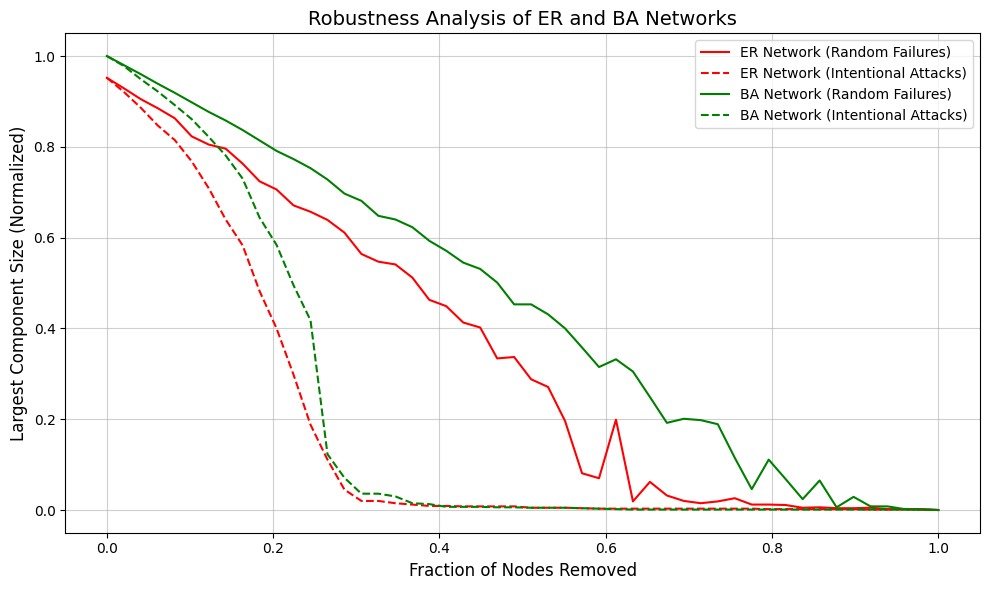

In [ ]:
# Parameters
num_nodes = 1000  # Total nodes in the graph
num_edges = 3333  # For ER graph
num_neighbors = 4  # For BA graph

# Simulate and plot
run_simulation_for_robustness_analysis(num_nodes, num_edges, num_neighbors)

## P 7.19

Which type of graph is more robust on those two threats? How
to explain it?

**Answer**

Based on the plot from P7.18, we can observe that the BA (scale-free) network is much more robust to both of those threats.
This might be due to the fragmentation of network, after removing larger hubs, there are still some smaller hubs connecting the nodes, so the largest component can stay intact longer. This is also the result of the nodes usually being connected to several hubs.

The random failures do not significantly affect BA network, because most of the nodes have low degrees, and removal of hubs is unlikely.